## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudyDataFrame = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouseStudyDataFrame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
totalMice = mouseStudyDataFrame["Mouse ID"].nunique()
totalMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateID = mouseStudyDataFrame.loc[mouseStudyDataFrame.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicateID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseStudyDataFrame.loc[mouseStudyDataFrame["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseStudyDataFrameClean = mouseStudyDataFrame.loc[mouseStudyDataFrame["Mouse ID"] != "g989"]
mouseStudyDataFrameClean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
totalMiceClean = mouseStudyDataFrameClean["Mouse ID"].nunique()
totalMiceClean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
studyMean = mouseStudyDataFrameClean['Tumor Volume (mm3)'].groupby(mouseStudyDataFrameClean['Drug Regimen']).mean()
studyMedian = mouseStudyDataFrameClean['Tumor Volume (mm3)'].groupby(mouseStudyDataFrameClean['Drug Regimen']).median()
studyVariance = mouseStudyDataFrameClean['Tumor Volume (mm3)'].groupby(mouseStudyDataFrameClean['Drug Regimen']).var()
studyStDev = mouseStudyDataFrameClean['Tumor Volume (mm3)'].groupby(mouseStudyDataFrameClean['Drug Regimen']).std()
studySEM = mouseStudyDataFrameClean['Tumor Volume (mm3)'].groupby(mouseStudyDataFrameClean['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.

summaryDF = pd.DataFrame({
    "Mean":studyMean, 
    "Median":studyMedian, 
    "Variance":studyVariance, 
    "Standard Deviation":studyStDev, 
    "SEM":studySEM
})
summaryDF


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryDF = mouseStudyDataFrameClean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice per Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

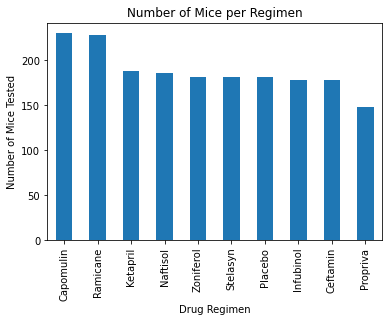

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Data to plot
pandasBarPlotData = mouseStudyDataFrameClean["Drug Regimen"].value_counts()

#The Plot
pandasBarPlot = pandasBarPlotData.plot(kind= 'bar')

#Additional formatting
pandasBarPlot.set_xlabel("Drug Regimen")
pandasBarPlot.set_ylabel("Number of Mice Tested")
pandasBarPlot.set_title("Number of Mice per Regimen")
pandasBarPlot

<function matplotlib.pyplot.show(close=None, block=None)>

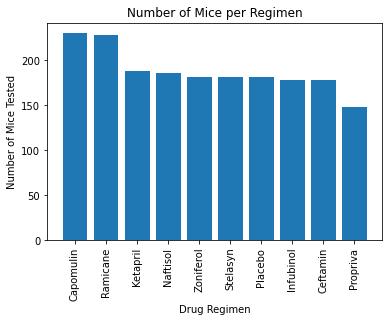

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#The Plot (resuse the "data to plot" from the last plot)
plt.bar(pandasBarPlotData.index.values, pandasBarPlotData.values)

# Additional formatting
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Regimen")
plt.xticks(rotation = "vertical")
plt.show

<AxesSubplot:ylabel='Sex'>

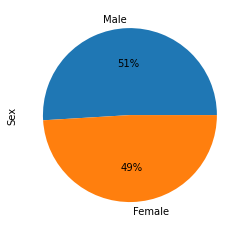

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Data to plot
pandasPiePlotData = mouseStudyDataFrameClean["Sex"].value_counts()

# The Plot
pandasPiePlot = pandasPiePlotData.plot(kind= 'pie', autopct= '%1.0f%%')
pandasPiePlot

<function matplotlib.pyplot.show(close=None, block=None)>

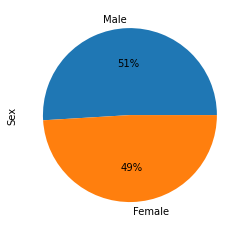

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# The Plot (resuse the "data to plot" from the last plot)
plt.pie(pandasPiePlotData, autopct='%1.0f%%', labels= pandasPiePlotData.index)

# Additional formatting
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mostRecentValues = mouseStudyDataFrameClean.groupby('Mouse ID').max('Timepoint')

# Edit table pre-merge
mostRecentValues = mostRecentValues.rename({'Timepoint': 'Max Timepoint', 'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'}, axis= 'columns')
mostRecentValues = mostRecentValues.drop({'Metastatic Sites', 'Age_months', 'Weight (g)'}, axis= 'columns')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouseStudyDFForStats = pd.merge(mouseStudyDataFrameClean, mostRecentValues, how="left", on=["Mouse ID", "Mouse ID"])

mouseStudyDFForStats

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint,Final Tumor Volume (mm3)
0,b128,0,45.000000,0,Capomulin,Female,9,22,45,45.651331
1,f932,0,45.000000,0,Ketapril,Male,15,29,0,45.000000
2,g107,0,45.000000,0,Ketapril,Female,2,29,35,71.905117
3,a457,0,45.000000,0,Ketapril,Female,11,30,10,49.783419
4,c819,0,45.000000,0,Ketapril,Male,21,25,40,62.175705
...,...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45,47.373423
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45,47.212200
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,45,58.634971


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentName = mouseStudyDFForStats['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
masterTumorVolData = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for currentDrug in treatmentName:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tempDataFrame = mouseStudyDFForStats.loc[mouseStudyDFForStats['Drug Regimen'] == currentDrug]

    # add subset and append that subset of data to the master list
    tempDataFrame = tempDataFrame.loc[tempDataFrame['Timepoint'] == tempDataFrame['Max Timepoint']]
    tumorVolData = tempDataFrame['Final Tumor Volume (mm3)']
    masterTumorVolData.append(tumorVolData)

    #Find IQR and bounds
    drugQuartile = tumorVolData.quantile([.25,.5,.75])
    lowerRange = drugQuartile[0.25]
    upperRange = drugQuartile[0.75]
    interQuartileRange = upperRange - lowerRange
    lowerBound = lowerRange - (1.5 * interQuartileRange)
    upperBound = upperRange + (1.5 * interQuartileRange)

    # Determine outliers using upper and lower bounds
    print('  -----  ')
    print(currentDrug + ':')
    print('Lower bound: ' + str(lowerBound))
    print('Upper bound: ' + str(upperBound))
    numOutliers = (tempDataFrame.loc[(tempDataFrame['Tumor Volume (mm3)'] >= upperBound) | (tempDataFrame['Tumor Volume (mm3)'] <= lowerBound)]).count()
    print(f'Number of outliers: {numOutliers[1]}')




  -----  
Capomulin:
Lower bound: 42.376491720000004
Upper bound: 49.37251379999999
Number of outliers: 23
  -----  
Ketapril:
Lower bound: 36.99186244000001
Upper bound: 89.60048379999998
Number of outliers: 0
  -----  
Naftisol:
Lower bound: 25.85334408499999
Upper bound: 95.78978676500002
Number of outliers: 0
  -----  
Infubinol:
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Number of outliers: 1
  -----  
Stelasyn:
Lower bound: 27.53557243999998
Upper bound: 94.04496758000002
Number of outliers: 0
  -----  
Ramicane:
Lower bound: 42.984251445
Upper bound: 48.359580925
Number of outliers: 20
  -----  
Zoniferol:
Lower bound: 24.77952216500001
Upper bound: 92.00293628499998
Number of outliers: 0
  -----  
Propriva:
Lower bound: 28.76529576625001
Upper bound: 83.04381145624998
Number of outliers: 0
  -----  
Placebo:
Lower bound: 30.15582196999999
Upper bound: 90.92136789000001
Number of outliers: 0
  -----  
Ceftamin:
Lower bound: 25.355449580000002
Upper bound: 87.6

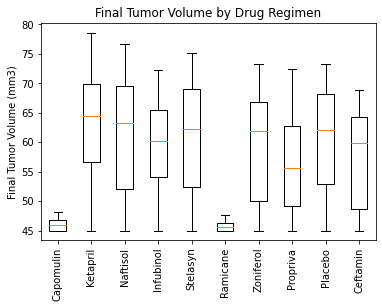

In [110]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## I'm ignoring the "four regimens of interest" mentioned by the starter code note above. 
## We specifically collected all the data in the for loop earlier, why go through extra work to hide some of it when it could be relevant and useful?

#####(If you really want to limit it to 4 for some reason, include this noted out code instead of the used code further down)#####
#
# # loc a Dataframe to the most current values
# mouseStudyDFForBoxPlot = mouseStudyDFForStats.loc[mouseStudyDFForStats['Timepoint'] == mouseStudyDFForStats['Max Timepoint']]
#
# # loc to relevant 4 by first using the code below the noted code here to plot the data and discover which regimens are of interest
# mouseStudyDFForBoxPlot = mouseStudyDFForBoxPlot.loc[(mouseStudyDFForBoxPlot['Drug Regimen'] == 'Capomulin') | 
#                                                     (mouseStudyDFForBoxPlot['Drug Regimen'] == 'Ramicane') | 
#                                                     (mouseStudyDFForBoxPlot['Drug Regimen'] == 'Propriva') | 
#                                                     (mouseStudyDFForBoxPlot['Drug Regimen'] == 'Placebo') ]
# 
# # Drop unrelated columns
# mouseStudyDFForBoxPlot = mouseStudyDFForBoxPlot.drop({'Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)', 'Max Timepoint'}, axis= 'columns')
# 
# # groupby Drug Regimen & use .boxplot function
# mouseStudyDFForBoxPlot.groupby(mouseStudyDFForBoxPlot['Drug Regimen']).boxplot()
# 
# # !!! Formatting needed & display not called, as this is not the primary code !!!
#
##########

    ###If using alt code above, note out from here to "###End"
# Instead of the above, use this single line to plot the boxplot
plt.boxplot(masterTumorVolData)

# format the boxplot
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4,5,6,7,8,9,10], treatmentName)
plt.xticks(rotation = "vertical")

plt.show()
    ###End

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
